# Bài 1:
Cho bài toán XOR
- Implement thuật toán neural network để giải bài toán dùng Pytorch


In [1]:
import torch
import torch.optim as optim

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.weights = [torch.randn(layers[i], layers[i+1], requires_grad=True) for i in range(len(layers) - 1)]
        self.biases = [torch.zeros(1, layers[i+1], requires_grad=True) for i in range(len(layers) - 1)]

    def forward(self, x):
        for i in range(len(self.layers) - 2):
            x = sigmoid(torch.mm(x, self.weights[i]) + self.biases[i])
        x = torch.mm(x, self.weights[-1]) + self.biases[-1]
        return x

def MSE_loss(outputs, labels):
    return torch.mean((outputs - labels) ** 2)

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

model = NeuralNetwork([2, 2, 1])

# Optimizer
optimizer = optim.SGD([{'params': model.weights, 'lr': 0.1}, {'params': model.biases, 'lr': 0.1}], lr=0.1)

for epoch in range(1000):
    outputs = model.forward(X)
    loss = MSE_loss(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    for param in model.weights + model.biases:
        param.data -= 0.1 * param.grad

    if epoch % 10 == 0:
        print(f'Epoch [{epoch +1}/1000], Loss: {loss.item()}')

with torch.no_grad():
    predictions = model.forward(X)
    predictions = (predictions > 0.5).float() 

print("Predictions:")
print(predictions)

Epoch [1/1000], Loss: 0.3815394639968872
Epoch [11/1000], Loss: 0.29362425208091736
Epoch [21/1000], Loss: 0.28514623641967773
Epoch [31/1000], Loss: 0.2785711884498596
Epoch [41/1000], Loss: 0.27340152859687805
Epoch [51/1000], Loss: 0.2692953944206238
Epoch [61/1000], Loss: 0.2660040259361267
Epoch [71/1000], Loss: 0.26334354281425476
Epoch [81/1000], Loss: 0.2611767053604126
Epoch [91/1000], Loss: 0.2593994736671448
Epoch [101/1000], Loss: 0.25793254375457764
Epoch [111/1000], Loss: 0.25671452283859253
Epoch [121/1000], Loss: 0.2556978464126587
Epoch [131/1000], Loss: 0.2548448145389557
Epoch [141/1000], Loss: 0.2541259825229645
Epoch [151/1000], Loss: 0.25351768732070923
Epoch [161/1000], Loss: 0.25300076603889465
Epoch [171/1000], Loss: 0.252560019493103
Epoch [181/1000], Loss: 0.2521829605102539
Epoch [191/1000], Loss: 0.25185930728912354
Epoch [201/1000], Loss: 0.2515806555747986
Epoch [211/1000], Loss: 0.2513400912284851
Epoch [221/1000], Loss: 0.25113189220428467
Epoch [231/10

# Bài 2: 
Cho dataset MNIST
- Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch
- Chỉnh learning rate, vẽ đồ thị loss tương ứng.
- Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Tải dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)
# Chia tập dữ liệu thành tập train và test
train_set, test_set = torch.utils.data.random_split(train_data, [int(0.8 * len(train_data)), int(0.2 * len(train_data))])

In [21]:
class NN_MNIST(nn.Module):
    def __init__(self):
        super(NN_MNIST, self).__init__()
        # Input layer
        self.input_layer = nn.Linear(28 * 28, 128)
        # Hidden layers
        self.hidden_layers = nn.ModuleList([
            nn.Linear(128, 128),
            nn.Linear(128, 128),
        ])
        # Output layer
        self.output_layer = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.input_layer(x)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

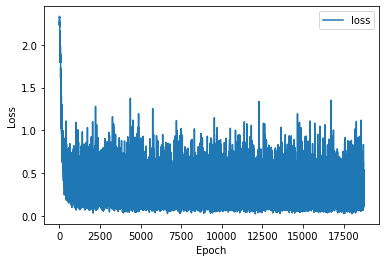

In [35]:
MNISTmodel=NN_MNIST()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(MNISTmodel.parameters(), lr=0.0001)

loss_values=[]

for epoch in range(10):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        outputs = MNISTmodel(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and update model parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save training loss
        loss_values.append(loss.item())

# Plot loss
plt.plot(loss_values,label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
#tính accuracy, f1, recall
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        outputs = MNISTmodel(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # Tính true_positives và false_negatives
        true_positives = (predicted == labels).sum().item()
        false_negatives = (predicted != labels).sum().item()
        total_positives = (predicted == 1).sum().item()
        precision = true_positives / correct
        # Tính f1 score và recall
        recall = true_positives / (true_positives + false_negatives)
        f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))
print("Recall:", recall)
print("F1-score:", f1)

Accuracy of the network on the test images: 91.44 %
Recall: 0.9375
F1-score: 0.0032751091703056767


# Bài 3:
Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4


Hàm softmax được sử dụng để chuyển đổi một vector đầu ra của một mô hình phân loại thành một vector xác suất. Mục đích của hàm softmax là làm cho các giá trị trong vector đầu ra có tổng bằng 1 và có thứ tự giảm dần.

Sử dụng hàm exponential function (e) có một số ưu điểm sau:

- Số mũ của exponential function là số dương, do đó các giá trị trong vector đầu ra của hàm softmax luôn là dương. Điều này rất quan trọng vì xác suất không thể là số âm.
- Số mũ của exponential function là số không giới hạn, do đó các giá trị trong vector đầu ra của hàm softmax có thể có giá trị rất lớn. Điều này giúp cho hàm softmax có thể tạo ra các xác suất rất nhỏ, điều cần thiết cho các bài toán phân loại khó.
- Exponential function là hàm đơn điệu tăng, do đó các giá trị trong vector đầu ra của hàm softmax luôn có thứ tự giảm dần. Điều này rất quan trọng vì chúng ta muốn xác suất của lớp dự đoán cao nhất phải lớn nhất.

Nếu sử dụng các số khác như 2, 3 hoặc 4 thay cho số mũ của exponential function, chúng ta sẽ không có được các ưu điểm trên. Ví dụ, nếu sử dụng số mũ là 2, chúng ta sẽ có một số giá trị âm trong vector đầu ra của hàm softmax, điều này không hợp lệ với xác suất. Nếu sử dụng số mũ là 3 hoặc 4, chúng ta sẽ không thể tạo ra các xác suất rất nhỏ, điều cần thiết cho các bài toán phân loại khó.

Tóm lại, hàm softmax sử dụng exponential function (e) vì nó có một số ưu điểm sau:

- Các giá trị trong vector đầu ra của hàm softmax luôn là dương.
- Các giá trị trong vector đầu ra của hàm softmax có thể có giá trị rất lớn.
- Các giá trị trong vector đầu ra của hàm softmax luôn có thứ tự giảm dần.